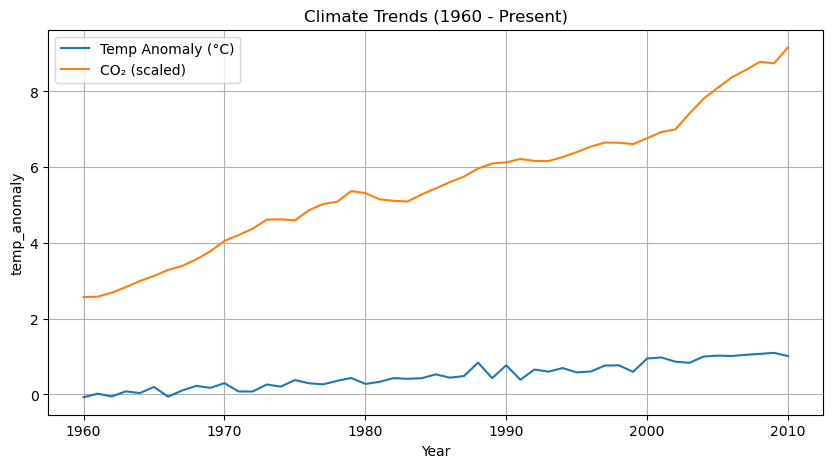

✅ RMSE: 0.12085581407217633
✅ R² Score: 0.8608192223755314


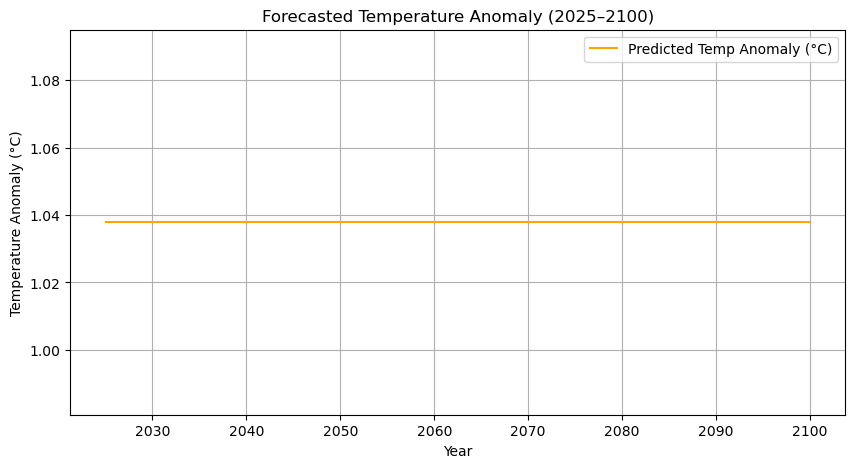

In [9]:
# ✅ climate_modeling.py or climate_modeling.ipynb

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# 📥 Step 1: Load Sample Climate Dataset (CO₂ Emissions)
url = "https://raw.githubusercontent.com/datasets/co2-fossil-global/master/global.csv"
df = pd.read_csv(url)

# 🧹 Step 2: Preprocessing
df = df.rename(columns={'Year': 'year', 'Total': 'co2'})
df = df[['year', 'co2']]
df = df[df['year'] >= 1960]

# ⚠️ Step 3: Simulate temperature anomaly (replace with real data later)
df['temp_anomaly'] = 0.02 * (df['year'] - 1960) + np.random.normal(0, 0.1, len(df))

# 📊 Step 4: Plot Raw Data
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='temp_anomaly', data=df, label='Temp Anomaly (°C)')
sns.lineplot(x='year', y=df['co2']/1000, data=df, label='CO₂ (scaled)')
plt.title("Climate Trends (1960 - Present)")

plt.xlabel("Year")

plt.legend()
plt.grid(True)
plt.show()

# 🧠 Step 5: Train-Test Split
X = df[['year', 'co2']]
y = df['temp_anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 6: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Step 7: Evaluate the Model
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)  # ✅ CORRECTED FUNCTION
r2 = r2_score(y_test, y_pred)

print("✅ RMSE:", rmse)
print("✅ R² Score:", r2)

# 🔮 Step 8: Predict Future Temperature Anomalies
future_years = pd.DataFrame({
    'year': np.arange(2025, 2101),
    'co2': np.linspace(10000, 20000, 76)  # Simulated future CO₂ values
})
future_preds = model.predict(future_years)

# 📉 Step 9: Plot Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(future_years['year'], future_preds, label="Predicted Temp Anomaly (°C)", color='orange')
plt.title("Forecasted Temperature Anomaly (2025–2100)")
plt.xlabel("Year")  # ✅ Corrected here
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()
